In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


**BMI CALCULATOR**

200 entries for height and weight
and calculate the BMI
and then categories as Slim,Normal,Fat

In [52]:
np.random.seed(50)
height = np.random.randint(140,200,200)
weight = np.random.randint(40,200,200)
bmi= weight/((height/100)**2)

def category(bmi):
    bmi=float(bmi)
    if bmi <= 19 and bmi>1:
        return "under weight"
    elif bmi<=25 and bmi > 19:
        return "normal"
    else:
        return "over weight"

category=np.array([category(b)for b in bmi])
category

BMI=pd.DataFrame({"Height":height,"Weight":weight,"BMI":bmi,"Category":category})
BMI

,Height,Weight,BMI,Category
0,188,118,33.386148,over weight
1,172,92,31.097891,over weight
2,151,134,58.769352,over weight
3,185,66,19.284149,normal
4,173,108,36.085402,over weight
...,...,...,...,...
195,154,94,39.635689,over weight
196,196,139,36.182840,over weight
197,142,60,29.756001,over weight
198,180,83,25.617284,over weight


In [53]:
L_C = LabelEncoder()
BMI["Category"] = L_C.fit_transform(BMI["Category"])
BMI

,Height,Weight,BMI,Category
0,188,118,33.386148,1
1,172,92,31.097891,1
2,151,134,58.769352,1
3,185,66,19.284149,0
4,173,108,36.085402,1
...,...,...,...,...
195,154,94,39.635689,1
196,196,139,36.182840,1
197,142,60,29.756001,1
198,180,83,25.617284,1


In [54]:
X=BMI[["Height","Weight"]]
Y=BMI["Category"]



In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)
print(X_train,X_test,Y_train,Y_test)

     Height  Weight
114     190     118
187     166      87
76      185      62
122     198     168
142     141     162
..      ...     ...
132     157     182
33      140      44
109     184     125
139     199     195
176     149      46

[140 rows x 2 columns]      Height  Weight
112     178      88
165     162      50
12      145     171
73      198     162
144     148     157
20      175     132
199     162     164
8       177      62
39      170     157
88      172      59
81      141     182
197     142      60
69      147      94
160     170      95
25      146      99
99      193     174
151     196      83
23      166      75
138     167      90
159     151     184
89      159      45
82      149      73
24      166      46
174     197      61
137     167     192
83      169      81
107     180      55
34      199      80
97      176      50
167     177      58
123     192     163
157     190     129
75      140     153
152     155      44
117     168     130
149     143     

In [56]:
model= KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

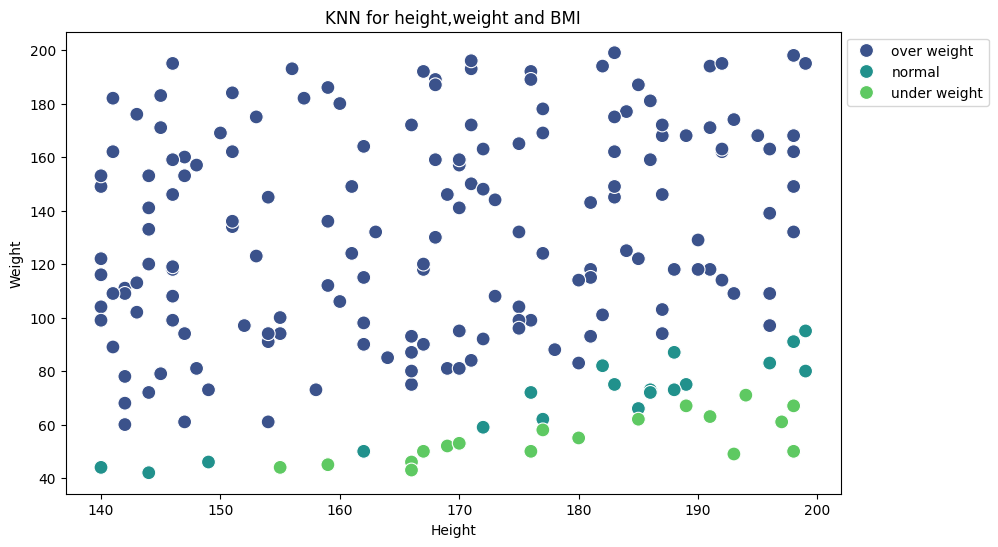

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis",s=100)
plt.title("KNN for height,weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()

Enter your Height in cm:  10
Enter your Weight in kg:  40


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Distance = [[130.0615239  134.01492454 137.36083867 137.76792079]]


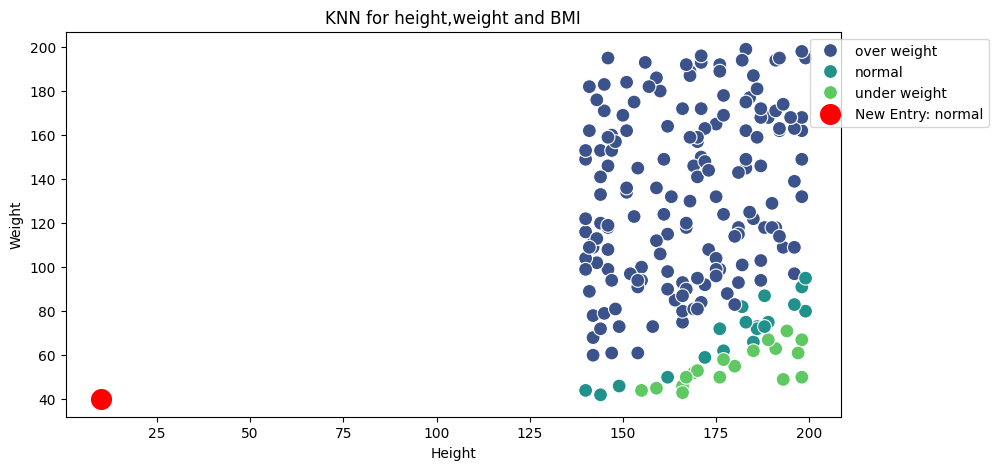

Height = 10.0 | Weight = 40.0 | Predicted Category = normal


In [68]:
def predictBMI(input_data,model,L_C):
    p=model.predict(input_data)
    P_C=L_C.inverse_transform(p)[0]
    return P_C
    

user_H=float(input("Enter your Height in cm: "))
user_W=float(input("Enter your Weight in kg: "))

input_data=np.array([[user_H,user_W]])
predicted_Category = predictBMI(input_data,model,L_C)

D,I=model.kneighbors(input_data,n_neighbors=4)

print(f"Distance = {D}")

plt.figure(figsize=(10,5))
#TRAINING DATA PLOT
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis",s=100)

#INPUT DATA PLOT
plt.scatter(input_data[0,0],input_data[0,1],color='red',s=200,label=f'New Entry: {predicted_Category}')
plt.title("KNN for height,weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()
print(f"Height = {user_H} | Weight = {user_W} | Predicted Category = {predicted_Category}")           
